In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling-1.csv')
df.head()

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [3]:
df.shape

(7124, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,Credit Score,Tenure,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
count,7124.000000,7.124000e+03,7118.000000,7110.000000,7124.000000,7111.000000,7114.000000,7123.000000,7124.000000
mean,3562.500000,1.569090e+07,649.687412,4.994515,1.524144,0.704542,0.495783,100489.812531,0.285935
std,2056.665991,7.174602e+04,97.283242,2.899323,0.608661,0.456280,0.500017,57559.538146,0.451890
min,1.000000,1.556570e+07,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1781.750000,1.562887e+07,582.000000,2.000000,1.000000,0.000000,0.000000,50992.930000,0.000000
50%,3562.500000,1.569074e+07,651.000000,5.000000,1.000000,1.000000,0.000000,100637.070000,0.000000
75%,5343.250000,1.575280e+07,717.000000,7.000000,2.000000,1.000000,1.000000,149591.645000,1.000000
max,7124.000000,1.581569e+07,850.000000,10.000000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          7124 non-null   int64  
 1   CustomerId         7124 non-null   int64  
 2   Surname            7124 non-null   object 
 3   Credit Score       7118 non-null   float64
 4   Geography          7120 non-null   object 
 5   Gender             7116 non-null   object 
 6   Age                7124 non-null   object 
 7   Tenure             7110 non-null   float64
 8   Balance            7121 non-null   object 
 9   Num of Dependents  7124 non-null   int64  
 10  Has CrCard         7111 non-null   float64
 11  Is Active Member   7114 non-null   float64
 12  Estimated Salary   7123 non-null   float64
 13  Exited             7124 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 779.3+ KB


In [6]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
Credit Score          6
Geography             4
Gender                8
Age                   0
Tenure               14
Balance               3
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      1
Exited                0
dtype: int64

In [7]:
df.Exited.unique()

array([1, 0], dtype=int64)

In [8]:
df.Exited.value_counts()

0    5087
1    2037
Name: Exited, dtype: int64

In [9]:
df.Age.unique()

array(['42', '41', '39', '43', '44', '50', '29', '27', '31', '24', '34',
       '25', '35', '45', '58', '32', '38', '46', '36', '33', '40', '51',
       '61', '49', '37', '19', '66', '56', '26', '21', '55', '75', '22',
       '30', '28', '65', '48', '52', '57', '73', '?', '47', '54', '72',
       '20', '67', '79', '62', '53', '80', '59', '68', '23', '60', '70',
       '63', '64', '18', '82', '69', '74', '71', '76', '77', '88', '85',
       '84', '78', '81'], dtype=object)

In [10]:
df[df['Age']=='?']

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
180,181,15716334,Rozier,850.0,Spain,Female,?,2.0,122311.21,1,1.0,1.0,19482.5,0


In [11]:
df.Age.mode()

0    37
Name: Age, dtype: object

In [12]:
df.Age.replace(['?','37'],inplace=True)

In [13]:
df[df['Age']=='?']

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited


In [14]:
df[df.Balance=='?']

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
2700,2701,15786200,Brock,564.0,France,Male,31,4.0,?,2,1.0,0.0,53520.03,0
2701,2702,15797010,Shen,649.0,France,Female,31,2.0,?,2,1.0,0.0,15200.61,0
2702,2703,15670172,Padovesi,622.0,France,Female,30,4.0,?,1,0.0,1.0,196894.62,0


In [15]:
df.Balance.mode()

0    3000
Name: Balance, dtype: object

In [16]:
df.Balance.replace(['?', 3000],inplace=True)

In [17]:
df[df.Balance=='?']

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited


In [18]:
df.Gender.unique()

array(['Female', 'Male', nan, '@'], dtype=object)

In [19]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [20]:
df.Gender.replace(['@',"Male"],inplace=True)

In [21]:
df[df.Gender=='@']

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited


In [22]:
df['Age']=df['Age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          7124 non-null   int64  
 1   CustomerId         7124 non-null   int64  
 2   Surname            7124 non-null   object 
 3   Credit Score       7118 non-null   float64
 4   Geography          7120 non-null   object 
 5   Gender             7106 non-null   object 
 6   Age                7124 non-null   int32  
 7   Tenure             7110 non-null   float64
 8   Balance            7121 non-null   object 
 9   Num of Dependents  7124 non-null   int64  
 10  Has CrCard         7111 non-null   float64
 11  Is Active Member   7114 non-null   float64
 12  Estimated Salary   7123 non-null   float64
 13  Exited             7124 non-null   int64  
dtypes: float64(5), int32(1), int64(4), object(4)
memory usage: 751.5+ KB


In [24]:
for column in df[['Geography','Gender','Has CrCard','Is Active Member']]:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode[0])

In [25]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
Credit Score          6
Geography             0
Gender                0
Age                   0
Tenure               14
Balance               3
Num of Dependents     0
Has CrCard            0
Is Active Member      0
Estimated Salary      1
Exited                0
dtype: int64

In [26]:
df.Geography.unique()

array(['France', 'Spain', 'Germany', '?'], dtype=object)

In [27]:
df.Geography.value_counts()

France     3478
Germany    1897
Spain      1748
?             1
Name: Geography, dtype: int64

In [28]:
df.Geography.mode()

0    France
Name: Geography, dtype: object

In [29]:
df.Geography.replace(['?','France'],inplace=True)

In [30]:
df[df.Geography=='?']

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited


In [31]:
 df['Balance']=df['Balance'].astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          7124 non-null   int64  
 1   CustomerId         7124 non-null   int64  
 2   Surname            7124 non-null   object 
 3   Credit Score       7118 non-null   float64
 4   Geography          7124 non-null   object 
 5   Gender             7124 non-null   object 
 6   Age                7124 non-null   int32  
 7   Tenure             7110 non-null   float64
 8   Balance            7121 non-null   float64
 9   Num of Dependents  7124 non-null   int64  
 10  Has CrCard         7124 non-null   float64
 11  Is Active Member   7124 non-null   float64
 12  Estimated Salary   7123 non-null   float64
 13  Exited             7124 non-null   int64  
dtypes: float64(6), int32(1), int64(4), object(3)
memory usage: 751.5+ KB


In [33]:
df.duplicated().sum()

0

In [34]:
df.drop('RowNumber',axis=1,inplace=True)

In [35]:
df.head()

,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,15634602,Hargrave,619.0,France,Female,42,2.0,3000.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502.0,Spain,Female,42,8.0,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699.0,Spain,Female,39,1.0,3000.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [36]:
df.drop('CustomerId',axis=1,inplace=True)

In [37]:
df.head()

,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,Hargrave,619.0,France,Female,42,2.0,3000.00,1,1.0,1.0,101348.88,1
1,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,Onio,502.0,Spain,Female,42,8.0,159660.80,3,1.0,0.0,113931.57,1
3,Boni,699.0,Spain,Female,39,1.0,3000.00,2,0.0,0.0,93826.63,0
4,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [38]:
df.drop('Surname',axis=1,inplace=True)

In [39]:
df.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,France,Female,42,2.0,3000.00,1,1.0,1.0,101348.88,1
1,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,Spain,Female,42,8.0,159660.80,3,1.0,0.0,113931.57,1
3,699.0,Spain,Female,39,1.0,3000.00,2,0.0,0.0,93826.63,0
4,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [40]:
df.isnull().sum()

Credit Score          6
Geography             0
Gender                0
Age                   0
Tenure               14
Balance               3
Num of Dependents     0
Has CrCard            0
Is Active Member      0
Estimated Salary      1
Exited                0
dtype: int64

<AxesSubplot:xlabel='Credit Score'>

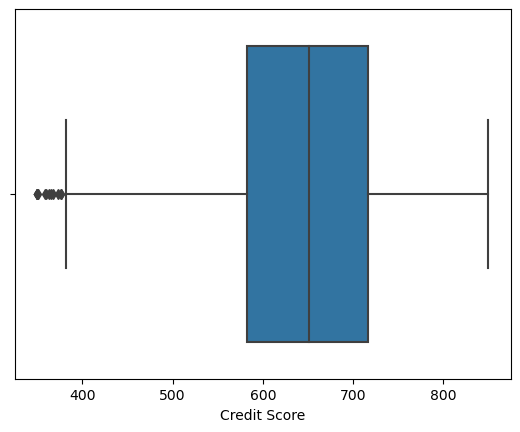

In [41]:
sns.boxplot(x=df['Credit Score'])

In [42]:
 df['Credit Score'].fillna(df['Credit Score'].median(),inplace= True)

<AxesSubplot:xlabel='Tenure'>

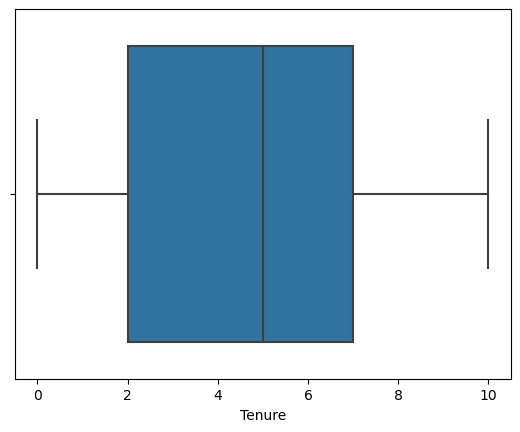

In [43]:
sns.boxplot(x=df['Tenure'])

<AxesSubplot:xlabel='Estimated Salary'>

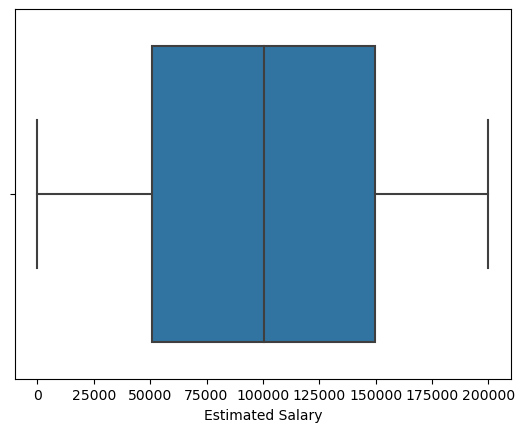

In [44]:
sns.boxplot(x=df['Estimated Salary'])

In [45]:
for column in df[['Tenure', 'Estimated Salary']]:
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)

In [49]:
df['Balance']=df['Balance'].fillna(3000)

In [50]:
df.isnull().sum()

Credit Score         0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
Num of Dependents    0
Has CrCard           0
Is Active Member     0
Estimated Salary     0
Exited               0
dtype: int64

In [51]:
df1=df.copy(deep=True)

In [52]:
df2=pd.get_dummies(df1,drop_first=True)
df2.head()

,Credit Score,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited,Geography_Germany,Geography_Spain
0,619.0,42,2.0,3000.00,1,1.0,1.0,101348.88,1,0,0
1,608.0,41,1.0,83807.86,1,0.0,1.0,112542.58,0,0,1
2,502.0,42,8.0,159660.80,3,1.0,0.0,113931.57,1,0,1
3,699.0,39,1.0,3000.00,2,0.0,0.0,93826.63,0,0,1
4,850.0,43,2.0,125510.82,1,1.0,1.0,79084.10,0,0,1


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x=df2.drop(['Exited'],axis=1)
y=df2['Exited']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc=StandardScaler()

In [58]:
x_train=sc.fit_transform(x_train)

In [59]:
x_train

array([[ 1.11001934, -0.510739  , -1.36884681, ..., -0.17202534,
        -1.03096454,  1.03137855],
       [-0.39755587,  0.22131595,  0.35622784, ...,  1.00587501,
        -1.03096454,  1.03137855],
       [ 0.3149283 , -0.60224586, -1.36884681, ..., -0.52500701,
         0.96996547, -0.9695761 ],
       ...,
       [-1.53340021,  1.5024121 , -1.36884681, ...,  0.31871379,
        -1.03096454,  1.03137855],
       [ 1.70891908, -0.7852596 , -1.36884681, ...,  0.02897279,
        -1.03096454,  1.03137855],
       [-0.26331972,  0.77035716, -1.36884681, ...,  0.32500445,
         0.96996547, -0.9695761 ]])

In [60]:
x_test=sc.fit_transform(x_test)

In [61]:
x_test

array([[ 0.49489412,  0.05187129, -0.01989964, ...,  0.91765363,
         0.98146271, -0.98146271],
       [ 0.31138135,  0.14649655,  0.32609072, ...,  1.46205616,
         0.98146271, -0.98146271],
       [ 1.25953063, -0.89438138,  0.32609072, ..., -0.66510076,
        -1.01888741,  1.01888741],
       ...,
       [-0.96301284,  0.52499762, -1.40386109, ..., -0.20627469,
         0.98146271, -0.98146271],
       [-0.48384062, -0.04275398,  0.32609072, ..., -1.62341065,
        -1.01888741,  1.01888741],
       [ 0.21962497,  0.24112182,  1.36406181, ..., -1.71786308,
         0.98146271, -0.98146271]])

In [62]:
from sklearn.neural_network import MLPClassifier

In [63]:
nn_clf=MLPClassifier( hidden_layer_sizes=100,solver='sgd',tol=0.0001, max_iter=5000,verbose=True)

In [64]:
nn_clf.fit(x_train,y_train)

Iteration 1, loss = 0.65887804
Iteration 2, loss = 0.63353229
Iteration 3, loss = 0.61425111
Iteration 4, loss = 0.60033988
Iteration 5, loss = 0.58986862
Iteration 6, loss = 0.58141716
Iteration 7, loss = 0.57422512
Iteration 8, loss = 0.56801937
Iteration 9, loss = 0.56242738
Iteration 10, loss = 0.55746367
Iteration 11, loss = 0.55291109
Iteration 12, loss = 0.54875634
Iteration 13, loss = 0.54497064
Iteration 14, loss = 0.54141507
Iteration 15, loss = 0.53820037
Iteration 16, loss = 0.53514088
Iteration 17, loss = 0.53237232
Iteration 18, loss = 0.52971248
Iteration 19, loss = 0.52723486
Iteration 20, loss = 0.52495484
Iteration 21, loss = 0.52279575
Iteration 22, loss = 0.52079839
Iteration 23, loss = 0.51885175
Iteration 24, loss = 0.51707894
Iteration 25, loss = 0.51536037
Iteration 26, loss = 0.51376311
Iteration 27, loss = 0.51221613
Iteration 28, loss = 0.51080315
Iteration 29, loss = 0.50940625
Iteration 30, loss = 0.50807186
Iteration 31, loss = 0.50679319
Iteration 32, los

Iteration 256, loss = 0.41257655
Iteration 257, loss = 0.41245573
Iteration 258, loss = 0.41235173
Iteration 259, loss = 0.41224575
Iteration 260, loss = 0.41210643
Iteration 261, loss = 0.41199451
Iteration 262, loss = 0.41187688
Iteration 263, loss = 0.41180306
Iteration 264, loss = 0.41165022
Iteration 265, loss = 0.41155421
Iteration 266, loss = 0.41144469
Iteration 267, loss = 0.41134021
Iteration 268, loss = 0.41123597
Iteration 269, loss = 0.41115288
Iteration 270, loss = 0.41101528
Iteration 271, loss = 0.41092709
Iteration 272, loss = 0.41084587
Iteration 273, loss = 0.41073065
Iteration 274, loss = 0.41065808
Iteration 275, loss = 0.41051711
Iteration 276, loss = 0.41042554
Iteration 277, loss = 0.41035335
Iteration 278, loss = 0.41024174
Iteration 279, loss = 0.41012276
Iteration 280, loss = 0.41002987
Iteration 281, loss = 0.40993040
Iteration 282, loss = 0.40987431
Iteration 283, loss = 0.40976494
Iteration 284, loss = 0.40967078
Iteration 285, loss = 0.40955626
Iteration 

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, solver='sgd', verbose=True)

In [65]:
nn_clf.score(x_train,y_train)

0.8235058162855997

In [66]:
y_train_pred=nn_clf.predict(x_train)

In [67]:
y_test_pred=nn_clf.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
confusion_matrix(y_train,y_train_pred)

array([[3355,  220],
       [ 660,  751]], dtype=int64)

<AxesSubplot:>

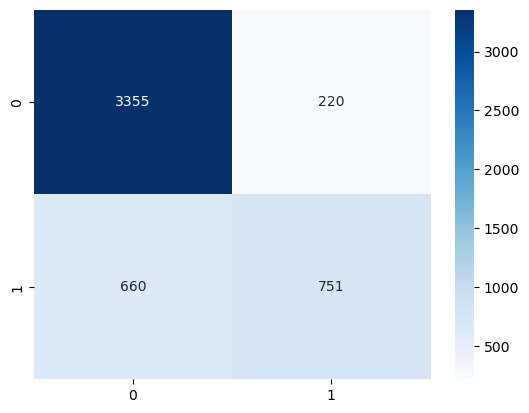

In [70]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap='Blues',fmt='d')

In [71]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      3575
           1       0.77      0.53      0.63      1411

    accuracy                           0.82      4986
   macro avg       0.80      0.74      0.76      4986
weighted avg       0.82      0.82      0.81      4986



In [72]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1512
           1       0.75      0.52      0.62       626

    accuracy                           0.81      2138
   macro avg       0.79      0.73      0.74      2138
weighted avg       0.80      0.81      0.80      2138



In [73]:
from sklearn.model_selection import GridSearchCV


In [74]:
param_grid={
    'hidden_layer_sizes':[100,200,500],
    'solver':['sgd','adam'],
    'tol':[0.01,0.001],
}

nncl=MLPClassifier(random_state=1,verbose=True,max_iter=5000)
gridsearch=GridSearchCV(estimator=nncl,param_grid=param_grid,cv=5)

In [75]:
gridsearch.fit(x_train,y_train)

Iteration 1, loss = 0.71767070
Iteration 2, loss = 0.66213924
Iteration 3, loss = 0.62143499
Iteration 4, loss = 0.59623837
Iteration 5, loss = 0.58108924
Iteration 6, loss = 0.57082673
Iteration 7, loss = 0.56379629
Iteration 8, loss = 0.55843578
Iteration 9, loss = 0.55417054
Iteration 10, loss = 0.55053596
Iteration 11, loss = 0.54734952
Iteration 12, loss = 0.54462264
Iteration 13, loss = 0.54206911
Iteration 14, loss = 0.53983707
Iteration 15, loss = 0.53767475
Iteration 16, loss = 0.53571449
Iteration 17, loss = 0.53389956
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71969044
Iteration 2, loss = 0.66463867
Iteration 3, loss = 0.62358371
Iteration 4, loss = 0.59851703
Iteration 5, loss = 0.58319151
Iteration 6, loss = 0.57316202
Iteration 7, loss = 0.56608941
Iteration 8, loss = 0.56064604
Iteration 9, loss = 0.55630772
Iteration 10, loss = 0.55275073
Iteration 11, loss = 0.54967603
Iteration 12, loss = 0.54683846


Iteration 4, loss = 0.59658410
Iteration 5, loss = 0.58092552
Iteration 6, loss = 0.57099966
Iteration 7, loss = 0.56358767
Iteration 8, loss = 0.55832211
Iteration 9, loss = 0.55389068
Iteration 10, loss = 0.55029033
Iteration 11, loss = 0.54704598
Iteration 12, loss = 0.54425193
Iteration 13, loss = 0.54167620
Iteration 14, loss = 0.53935606
Iteration 15, loss = 0.53726090
Iteration 16, loss = 0.53522246
Iteration 17, loss = 0.53336487
Iteration 18, loss = 0.53165624
Iteration 19, loss = 0.53000774
Iteration 20, loss = 0.52847637
Iteration 21, loss = 0.52705602
Iteration 22, loss = 0.52564342
Iteration 23, loss = 0.52435656
Iteration 24, loss = 0.52314709
Iteration 25, loss = 0.52199060
Iteration 26, loss = 0.52088087
Iteration 27, loss = 0.51978907
Iteration 28, loss = 0.51876039
Iteration 29, loss = 0.51781692
Iteration 30, loss = 0.51687160
Iteration 31, loss = 0.51595793
Iteration 32, loss = 0.51511301
Iteration 33, loss = 0.51428250
Iteration 34, loss = 0.51347295
Iteration 35, 

Iteration 5, loss = 0.50262606
Iteration 6, loss = 0.49457839
Iteration 7, loss = 0.48713452
Iteration 8, loss = 0.48045312
Iteration 9, loss = 0.47381440
Iteration 10, loss = 0.46712980
Iteration 11, loss = 0.46119736
Iteration 12, loss = 0.45464918
Iteration 13, loss = 0.44919464
Iteration 14, loss = 0.44427156
Iteration 15, loss = 0.43900319
Iteration 16, loss = 0.43477339
Iteration 17, loss = 0.43071181
Iteration 18, loss = 0.42744210
Iteration 19, loss = 0.42437700
Iteration 20, loss = 0.42167123
Iteration 21, loss = 0.41920873
Iteration 22, loss = 0.41695374
Iteration 23, loss = 0.41560564
Iteration 24, loss = 0.41334415
Iteration 25, loss = 0.41235892
Iteration 26, loss = 0.41052301
Iteration 27, loss = 0.40896848
Iteration 28, loss = 0.40837090
Iteration 29, loss = 0.40697253
Iteration 30, loss = 0.40575934
Iteration 31, loss = 0.40495773
Iteration 32, loss = 0.40395053
Iteration 33, loss = 0.40311159
Iteration 34, loss = 0.40212943
Iteration 35, loss = 0.40178337
Iteration 36,

Iteration 12, loss = 0.56258209
Iteration 13, loss = 0.55880085
Iteration 14, loss = 0.55528177
Iteration 15, loss = 0.55205862
Iteration 16, loss = 0.54910248
Iteration 17, loss = 0.54632940
Iteration 18, loss = 0.54377020
Iteration 19, loss = 0.54138588
Iteration 20, loss = 0.53914020
Iteration 21, loss = 0.53705244
Iteration 22, loss = 0.53507768
Iteration 23, loss = 0.53325557
Iteration 24, loss = 0.53148425
Iteration 25, loss = 0.52987543
Iteration 26, loss = 0.52826853
Iteration 27, loss = 0.52682373
Iteration 28, loss = 0.52544596
Iteration 29, loss = 0.52410060
Iteration 30, loss = 0.52286183
Iteration 31, loss = 0.52166994
Iteration 32, loss = 0.52051825
Iteration 33, loss = 0.51945237
Iteration 34, loss = 0.51842712
Iteration 35, loss = 0.51740738
Iteration 36, loss = 0.51647072
Iteration 37, loss = 0.51554842
Iteration 38, loss = 0.51466372
Iteration 39, loss = 0.51380798
Iteration 40, loss = 0.51298960
Iteration 41, loss = 0.51220990
Iteration 42, loss = 0.51147044
Iteratio

Iteration 10, loss = 0.45770652
Iteration 11, loss = 0.45051194
Iteration 12, loss = 0.44400942
Iteration 13, loss = 0.43926561
Iteration 14, loss = 0.43421297
Iteration 15, loss = 0.42964859
Iteration 16, loss = 0.42648857
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67074890
Iteration 2, loss = 0.56205791
Iteration 3, loss = 0.52781382
Iteration 4, loss = 0.50939968
Iteration 5, loss = 0.49741414
Iteration 6, loss = 0.48798800
Iteration 7, loss = 0.47895775
Iteration 8, loss = 0.47006847
Iteration 9, loss = 0.46126383
Iteration 10, loss = 0.45242602
Iteration 11, loss = 0.44497724
Iteration 12, loss = 0.43781528
Iteration 13, loss = 0.43225938
Iteration 14, loss = 0.42715671
Iteration 15, loss = 0.42286299
Iteration 16, loss = 0.41986589
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66827371
Iteration 2, loss = 0.55946012
Iteration 3, loss = 0.52518756


Iteration 71, loss = 0.37862561
Iteration 72, loss = 0.37797387
Iteration 73, loss = 0.37824725
Iteration 74, loss = 0.37729260
Iteration 75, loss = 0.37800907
Iteration 76, loss = 0.37830338
Iteration 77, loss = 0.37656781
Iteration 78, loss = 0.37633805
Iteration 79, loss = 0.37529578
Iteration 80, loss = 0.37531498
Iteration 81, loss = 0.37601618
Iteration 82, loss = 0.37411158
Iteration 83, loss = 0.37431672
Iteration 84, loss = 0.37406420
Iteration 85, loss = 0.37384140
Iteration 86, loss = 0.37302607
Iteration 87, loss = 0.37317488
Iteration 88, loss = 0.37213761
Iteration 89, loss = 0.37167307
Iteration 90, loss = 0.37176812
Iteration 91, loss = 0.37132996
Iteration 92, loss = 0.37109229
Iteration 93, loss = 0.37051364
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66827371
Iteration 2, loss = 0.55946012
Iteration 3, loss = 0.52518756
Iteration 4, loss = 0.50678764
Iteration 5, loss = 0.49484492
Iteration 6, loss =

Iteration 18, loss = 0.53451301
Iteration 19, loss = 0.53247310
Iteration 20, loss = 0.53055073
Iteration 21, loss = 0.52876799
Iteration 22, loss = 0.52710510
Iteration 23, loss = 0.52555577
Iteration 24, loss = 0.52403930
Iteration 25, loss = 0.52266757
Iteration 26, loss = 0.52134701
Iteration 27, loss = 0.52008199
Iteration 28, loss = 0.51889062
Iteration 29, loss = 0.51777925
Iteration 30, loss = 0.51671350
Iteration 31, loss = 0.51568412
Iteration 32, loss = 0.51468314
Iteration 33, loss = 0.51374225
Iteration 34, loss = 0.51285514
Iteration 35, loss = 0.51197873
Iteration 36, loss = 0.51114577
Iteration 37, loss = 0.51034451
Iteration 38, loss = 0.50955969
Iteration 39, loss = 0.50879900
Iteration 40, loss = 0.50809564
Iteration 41, loss = 0.50735186
Iteration 42, loss = 0.50669875
Iteration 43, loss = 0.50601885
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.74138646
Iteration 2, loss = 0.68145899
Iteration 3, los

Iteration 7, loss = 0.44841127
Iteration 8, loss = 0.43802513
Iteration 9, loss = 0.42939391
Iteration 10, loss = 0.42389455
Iteration 11, loss = 0.41873520
Iteration 12, loss = 0.41363647
Iteration 13, loss = 0.41122718
Iteration 14, loss = 0.40868978
Iteration 15, loss = 0.40634976
Iteration 16, loss = 0.40419088
Iteration 17, loss = 0.40252837
Iteration 18, loss = 0.40142810
Iteration 19, loss = 0.40052773
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62338501
Iteration 2, loss = 0.52497676
Iteration 3, loss = 0.49899232
Iteration 4, loss = 0.48527694
Iteration 5, loss = 0.47209862
Iteration 6, loss = 0.45915379
Iteration 7, loss = 0.44729036
Iteration 8, loss = 0.43735213
Iteration 9, loss = 0.42918573
Iteration 10, loss = 0.42365205
Iteration 11, loss = 0.41973689
Iteration 12, loss = 0.41480552
Iteration 13, loss = 0.41220671
Iteration 14, loss = 0.41031448
Iteration 15, loss = 0.40833300
Iteration 16, loss = 0.407

Iteration 63, loss = 0.37355682
Iteration 64, loss = 0.37441967
Iteration 65, loss = 0.37398125
Iteration 66, loss = 0.37289248
Iteration 67, loss = 0.37355201
Iteration 68, loss = 0.37157813
Iteration 69, loss = 0.37124389
Iteration 70, loss = 0.36985549
Iteration 71, loss = 0.37066043
Iteration 72, loss = 0.36875007
Iteration 73, loss = 0.36936477
Iteration 74, loss = 0.36850115
Iteration 75, loss = 0.36651092
Iteration 76, loss = 0.36543766
Iteration 77, loss = 0.36663284
Iteration 78, loss = 0.36539120
Iteration 79, loss = 0.36383395
Iteration 80, loss = 0.36406644
Iteration 81, loss = 0.36327158
Iteration 82, loss = 0.36509350
Iteration 83, loss = 0.36344625
Iteration 84, loss = 0.36285649
Iteration 85, loss = 0.36346504
Iteration 86, loss = 0.36012591
Iteration 87, loss = 0.35947678
Iteration 88, loss = 0.35907665
Iteration 89, loss = 0.35862340
Iteration 90, loss = 0.35848960
Iteration 91, loss = 0.35822648
Iteration 92, loss = 0.35756440
Iteration 93, loss = 0.35821290
Iteratio

Iteration 56, loss = 0.37721629
Iteration 57, loss = 0.37635882
Iteration 58, loss = 0.37682731
Iteration 59, loss = 0.37501461
Iteration 60, loss = 0.37389320
Iteration 61, loss = 0.37389370
Iteration 62, loss = 0.37313845
Iteration 63, loss = 0.37398658
Iteration 64, loss = 0.37366478
Iteration 65, loss = 0.37034722
Iteration 66, loss = 0.37236613
Iteration 67, loss = 0.37116103
Iteration 68, loss = 0.36928490
Iteration 69, loss = 0.36890129
Iteration 70, loss = 0.36993391
Iteration 71, loss = 0.36997170
Iteration 72, loss = 0.36785168
Iteration 73, loss = 0.36803118
Iteration 74, loss = 0.36613113
Iteration 75, loss = 0.36547745
Iteration 76, loss = 0.36681349
Iteration 77, loss = 0.36436085
Iteration 78, loss = 0.36419430
Iteration 79, loss = 0.36377451
Iteration 80, loss = 0.36162587
Iteration 81, loss = 0.36183322
Iteration 82, loss = 0.36167903
Iteration 83, loss = 0.36078938
Iteration 84, loss = 0.36125250
Iteration 85, loss = 0.36127418
Iteration 86, loss = 0.35933754
Iteratio

Iteration 68, loss = 0.36808372
Iteration 69, loss = 0.36853647
Iteration 70, loss = 0.36867650
Iteration 71, loss = 0.36890849
Iteration 72, loss = 0.36736047
Iteration 73, loss = 0.36789902
Iteration 74, loss = 0.36479771
Iteration 75, loss = 0.36458894
Iteration 76, loss = 0.36487774
Iteration 77, loss = 0.36415991
Iteration 78, loss = 0.36429555
Iteration 79, loss = 0.36334761
Iteration 80, loss = 0.36213702
Iteration 81, loss = 0.36211489
Iteration 82, loss = 0.36177696
Iteration 83, loss = 0.36075140
Iteration 84, loss = 0.36111216
Iteration 85, loss = 0.35936086
Iteration 86, loss = 0.35872415
Iteration 87, loss = 0.35844355
Iteration 88, loss = 0.35790542
Iteration 89, loss = 0.35687750
Iteration 90, loss = 0.35909940
Iteration 91, loss = 0.35650763
Iteration 92, loss = 0.35672257
Iteration 93, loss = 0.35665048
Iteration 94, loss = 0.35736158
Iteration 95, loss = 0.35504796
Iteration 96, loss = 0.35379172
Iteration 97, loss = 0.35437781
Iteration 98, loss = 0.35682695
Iteratio

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=5000, random_state=1,
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [100, 200, 500],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [76]:
gridsearch.best_params_

{'hidden_layer_sizes': 100, 'solver': 'adam', 'tol': 0.001}

In [77]:
best_grid=gridsearch.best_estimator_

In [78]:
ytrain_pred=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

In [79]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3575
           1       0.77      0.56      0.65      1411

    accuracy                           0.83      4986
   macro avg       0.81      0.75      0.77      4986
weighted avg       0.82      0.83      0.82      4986



In [80]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1512
           1       0.75      0.52      0.62       626

    accuracy                           0.81      2138
   macro avg       0.79      0.73      0.74      2138
weighted avg       0.80      0.81      0.80      2138



In [81]:
nn_clf=MLPClassifier(hidden_layer_sizes=(100,100,200),solver='sgd',tol=0.0001,max_iter=5000,verbose=True)

In [82]:
nn_clf.fit(x_train,y_train)

Iteration 1, loss = 0.66969124
Iteration 2, loss = 0.62989048
Iteration 3, loss = 0.60754433
Iteration 4, loss = 0.59719207
Iteration 5, loss = 0.59106737
Iteration 6, loss = 0.58697135
Iteration 7, loss = 0.58363938
Iteration 8, loss = 0.58055614
Iteration 9, loss = 0.57764053
Iteration 10, loss = 0.57476006
Iteration 11, loss = 0.57193966
Iteration 12, loss = 0.56912032
Iteration 13, loss = 0.56625806
Iteration 14, loss = 0.56345154
Iteration 15, loss = 0.56060259
Iteration 16, loss = 0.55776754
Iteration 17, loss = 0.55489483
Iteration 18, loss = 0.55211420
Iteration 19, loss = 0.54928718
Iteration 20, loss = 0.54649224
Iteration 21, loss = 0.54372977
Iteration 22, loss = 0.54104205
Iteration 23, loss = 0.53837248
Iteration 24, loss = 0.53576385
Iteration 25, loss = 0.53327676
Iteration 26, loss = 0.53080964
Iteration 27, loss = 0.52842080
Iteration 28, loss = 0.52610729
Iteration 29, loss = 0.52391610
Iteration 30, loss = 0.52179706
Iteration 31, loss = 0.51978041
Iteration 32, los

Iteration 253, loss = 0.38552755
Iteration 254, loss = 0.38579388
Iteration 255, loss = 0.38546206
Iteration 256, loss = 0.38525769
Iteration 257, loss = 0.38510851
Iteration 258, loss = 0.38506630
Iteration 259, loss = 0.38490535
Iteration 260, loss = 0.38467520
Iteration 261, loss = 0.38464456
Iteration 262, loss = 0.38434824
Iteration 263, loss = 0.38447416
Iteration 264, loss = 0.38409227
Iteration 265, loss = 0.38406059
Iteration 266, loss = 0.38402259
Iteration 267, loss = 0.38384785
Iteration 268, loss = 0.38368447
Iteration 269, loss = 0.38356498
Iteration 270, loss = 0.38344101
Iteration 271, loss = 0.38327972
Iteration 272, loss = 0.38328637
Iteration 273, loss = 0.38296167
Iteration 274, loss = 0.38285557
Iteration 275, loss = 0.38282135
Iteration 276, loss = 0.38264596
Iteration 277, loss = 0.38262593
Iteration 278, loss = 0.38252354
Iteration 279, loss = 0.38223749
Iteration 280, loss = 0.38227832
Iteration 281, loss = 0.38199304
Iteration 282, loss = 0.38195167
Iteration 

Iteration 502, loss = 0.35680772
Iteration 503, loss = 0.35656644
Iteration 504, loss = 0.35662174
Iteration 505, loss = 0.35635716
Iteration 506, loss = 0.35643817
Iteration 507, loss = 0.35647766
Iteration 508, loss = 0.35611729
Iteration 509, loss = 0.35603692
Iteration 510, loss = 0.35581234
Iteration 511, loss = 0.35566239
Iteration 512, loss = 0.35554692
Iteration 513, loss = 0.35544978
Iteration 514, loss = 0.35545981
Iteration 515, loss = 0.35534757
Iteration 516, loss = 0.35505684
Iteration 517, loss = 0.35490464
Iteration 518, loss = 0.35481259
Iteration 519, loss = 0.35463797
Iteration 520, loss = 0.35456584
Iteration 521, loss = 0.35443318
Iteration 522, loss = 0.35429818
Iteration 523, loss = 0.35419852
Iteration 524, loss = 0.35416380
Iteration 525, loss = 0.35391690
Iteration 526, loss = 0.35401869
Iteration 527, loss = 0.35402480
Iteration 528, loss = 0.35368991
Iteration 529, loss = 0.35349281
Iteration 530, loss = 0.35355271
Iteration 531, loss = 0.35343781
Iteration 

Iteration 751, loss = 0.32521860
Iteration 752, loss = 0.32502697
Iteration 753, loss = 0.32526985
Iteration 754, loss = 0.32473409
Iteration 755, loss = 0.32515519
Iteration 756, loss = 0.32443557
Iteration 757, loss = 0.32439813
Iteration 758, loss = 0.32400257
Iteration 759, loss = 0.32446988
Iteration 760, loss = 0.32445383
Iteration 761, loss = 0.32432418
Iteration 762, loss = 0.32405753
Iteration 763, loss = 0.32376488
Iteration 764, loss = 0.32423340
Iteration 765, loss = 0.32326344
Iteration 766, loss = 0.32308058
Iteration 767, loss = 0.32328309
Iteration 768, loss = 0.32279529
Iteration 769, loss = 0.32261362
Iteration 770, loss = 0.32293873
Iteration 771, loss = 0.32216927
Iteration 772, loss = 0.32219189
Iteration 773, loss = 0.32215952
Iteration 774, loss = 0.32172174
Iteration 775, loss = 0.32209431
Iteration 776, loss = 0.32172750
Iteration 777, loss = 0.32150072
Iteration 778, loss = 0.32117026
Iteration 779, loss = 0.32122246
Iteration 780, loss = 0.32134990
Iteration 

Iteration 1000, loss = 0.28641037
Iteration 1001, loss = 0.28591395
Iteration 1002, loss = 0.28626675
Iteration 1003, loss = 0.28611155
Iteration 1004, loss = 0.28624795
Iteration 1005, loss = 0.28609547
Iteration 1006, loss = 0.28610891
Iteration 1007, loss = 0.28514701
Iteration 1008, loss = 0.28545771
Iteration 1009, loss = 0.28515089
Iteration 1010, loss = 0.28447072
Iteration 1011, loss = 0.28454802
Iteration 1012, loss = 0.28542728
Iteration 1013, loss = 0.28335113
Iteration 1014, loss = 0.28438755
Iteration 1015, loss = 0.28503450
Iteration 1016, loss = 0.28438503
Iteration 1017, loss = 0.28379691
Iteration 1018, loss = 0.28282708
Iteration 1019, loss = 0.28330757
Iteration 1020, loss = 0.28270263
Iteration 1021, loss = 0.28306972
Iteration 1022, loss = 0.28209948
Iteration 1023, loss = 0.28197744
Iteration 1024, loss = 0.28246236
Iteration 1025, loss = 0.28326062
Iteration 1026, loss = 0.28154637
Iteration 1027, loss = 0.28232530
Iteration 1028, loss = 0.28195822
Iteration 1029

Iteration 1241, loss = 0.24605386
Iteration 1242, loss = 0.24512742
Iteration 1243, loss = 0.24410106
Iteration 1244, loss = 0.24456400
Iteration 1245, loss = 0.24424908
Iteration 1246, loss = 0.24387536
Iteration 1247, loss = 0.24468798
Iteration 1248, loss = 0.24461217
Iteration 1249, loss = 0.24217020
Iteration 1250, loss = 0.24382691
Iteration 1251, loss = 0.24490061
Iteration 1252, loss = 0.24249271
Iteration 1253, loss = 0.24236654
Iteration 1254, loss = 0.24293390
Iteration 1255, loss = 0.24250457
Iteration 1256, loss = 0.24289471
Iteration 1257, loss = 0.24371763
Iteration 1258, loss = 0.24135796
Iteration 1259, loss = 0.24221951
Iteration 1260, loss = 0.24168503
Iteration 1261, loss = 0.24334507
Iteration 1262, loss = 0.24180465
Iteration 1263, loss = 0.24085708
Iteration 1264, loss = 0.24107147
Iteration 1265, loss = 0.24156969
Iteration 1266, loss = 0.24085032
Iteration 1267, loss = 0.24105321
Iteration 1268, loss = 0.23948559
Iteration 1269, loss = 0.23998953
Iteration 1270

MLPClassifier(hidden_layer_sizes=(100, 100, 200), max_iter=5000, solver='sgd',
              verbose=True)

In [83]:
nn_clf.score(x_train,y_train)

0.9051343762535098

In [84]:
ytrain_pred=nn_clf.predict(x_train)

In [85]:
ytest_pred=nn_clf.predict(x_test)

In [86]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3575
           1       0.87      0.78      0.82      1411

    accuracy                           0.91      4986
   macro avg       0.89      0.87      0.88      4986
weighted avg       0.90      0.91      0.90      4986



In [87]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1512
           1       0.61      0.54      0.58       626

    accuracy                           0.77      2138
   macro avg       0.72      0.70      0.71      2138
weighted avg       0.76      0.77      0.76      2138

